# Stable Baselines, a Fork of OpenAI Baselines - Getting Started

Medium article: [https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82](https://medium.com/@araffin/stable-baselines-a-fork-of-openai-baselines-df87c4b2fc82)

## Install Dependencies and Stable Baselines Using Pip



```

sudo apt-get update && sudo apt-get install cmake libopenmpi-dev zlib1g-dev
```


```

pip install stable-baselines
```

In [5]:
!apt install cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.2.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
The following additional packages will be installed:
  autotools-dev cmake-data file ibverbs-providers libarchive13 libfabric1
  libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev libibverbs1
  libjsoncpp1 libltdl-dev libltdl7 liblzo2-2 libmagic-mgc libmagic1
  libnl-3-200 libnl-route-3-200 libnuma-dev libnuma1 libopenmpi2 libpciaccess0
  libpsm-infinipath1 librdmacm1 librhash0 libtool libuv1 ocl-icd-libopencl1
  openmpi-bin openmpi-common
Suggested packages:
  cmake-doc ninja-build lrzip libhwloc-contrib-plugins libtool-doc openmpi-doc
  pciutils autoconf automaken gcj-jdk
The following NEW packages will be installed:
  autotools-dev cmake cmake-data file ibverbs-providers libarchive13
  libfabric1 libhwloc-dev libhwloc-plugins libhwloc5 libibverbs-dev
  libibverbs1 libjsoncpp1 liblt

## Import policy, RL agent, ...

In [0]:
import gym
import numpy as np

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.ppo2 import PPO2

## Create the Gym env and instantiate the agent

For this example, we will use CartPole environment, a classic control problem.

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "

Cartpole environment: [https://gym.openai.com/envs/CartPole-v1/](https://gym.openai.com/envs/CartPole-v1/)

![Cartpole](https://cdn-images-1.medium.com/max/1143/1*h4WTQNVIsvMXJTCpXm_TAw.gif)

Note: vectorized environments allow to easily multiprocess training. In this example, we are using only one process, hence the DummyVecEnv.

We chose the MlpPolicy because input of CartPole is a feature vector, not images.

The type of action to use (discrete/continuous) will be automatically deduced from the environment action space



In [7]:
env = gym.make('CartPole-v1')
# vectorized environments allow to easily multiprocess training
# we demonstrate its usefulness in the next examples
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run

model = PPO2(MlpPolicy, env, verbose=0)

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


We create a helper function to evaluate the agent:

In [0]:
def evaluate(model, num_steps=1000):
  """
  Evaluate a RL agent
  :param model: (BaseRLModel object) the RL Agent
  :param num_steps: (int) number of timesteps to evaluate it
  :return: (float) Mean reward for the last 100 episodes
  """
  episode_rewards = [0.0]
  obs = env.reset()
  for i in range(num_steps):
      # _states are only useful when using LSTM policies
      action, _states = model.predict(obs)
      # here, action, rewards and dones are arrays
      # because we are using vectorized env
      obs, rewards, dones, info = env.step(action)
      
      # Stats
      episode_rewards[-1] += rewards[0]
      if dones[0]:
          obs = env.reset()
          episode_rewards.append(0.0)
  # Compute mean reward for the last 100 episodes
  mean_100ep_reward = round(np.mean(episode_rewards[:]), 1)
  print("Mean reward:", mean_100ep_reward, "Num episodes:", len(episode_rewards))
  
  return episode_rewards

Let's evaluate the un-trained agent, this should be a random agent.

In [9]:
# Random Agent, before training
mean_reward_before_train = evaluate(model, num_steps=10000)

Mean reward: 22.1 Num episodes: 453


## Train the agent and evaluate it

In [10]:
# Train the agent for 10000 steps
model.learn(total_timesteps=10000)

In [22]:
# Evaluate the trained agent
mean_reward = evaluate(model, num_steps=5000000)

Mean reward: 26.2 Num episodes: 190776


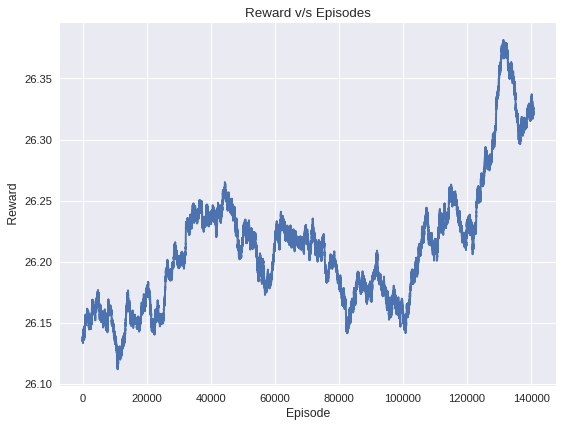

In [37]:
smoothing = 50000
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Reward v/s Episodes")
plt.xlabel("Episode")
plt.ylabel(" Reward".format(smoothing))
episode_ma = np.convolve(mean_reward, 
                         np.ones((smoothing,))/smoothing, mode='valid')
plt.plot(episode_ma)

In [16]:
mean_reward

[102.0,
 104.0,
 182.0,
 117.0,
 128.0,
 172.0,
 114.0,
 101.0,
 193.0,
 261.0,
 153.0,
 206.0,
 129.0,
 346.0,
 91.0,
 78.0,
 127.0,
 162.0,
 147.0,
 170.0,
 217.0,
 228.0,
 191.0,
 169.0,
 121.0,
 102.0,
 105.0,
 221.0,
 146.0,
 82.0,
 112.0,
 127.0,
 209.0,
 169.0,
 118.0,
 190.0,
 116.0,
 99.0,
 190.0,
 128.0,
 145.0,
 175.0,
 108.0,
 143.0,
 125.0,
 143.0,
 91.0,
 130.0,
 160.0,
 243.0,
 88.0,
 186.0,
 117.0,
 139.0,
 107.0,
 47.0,
 246.0,
 226.0,
 84.0,
 166.0,
 155.0,
 178.0,
 156.0,
 152.0,
 104.0,
 125.0,
 138.0]

Apparently the training went well, the mean reward increased a lot ! 

## Bonus: Train a RL Model in One Line

In [21]:
model = PPO2('MlpPolicy', "CartPole-v1", verbose=1).learn(1000)

Creating environment from the given name, wrapped in a DummyVecEnv.


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


---------------------------------------
| approxkl           | 3.9708466e-05  |
| clipfrac           | 0.0            |
| ep_rewmean         | nan            |
| eplenmean          | nan            |
| explained_variance | -0.00157       |
| fps                | 423            |
| nupdates           | 2              |
| policy_entropy     | 0.6930626      |
| policy_loss        | -0.00064205984 |
| serial_timesteps   | 256            |
| time_elapsed       | 2.38e-06       |
| total_timesteps    | 256            |
| value_loss         | 68.164085      |
---------------------------------------
--------------------------------------
| approxkl           | 1.3435842e-06 |
| clipfrac           | 0.0           |
| ep_rewmean         | nan           |
| eplenmean          | nan           |
| explained_variance | 0.00168       |
| fps                | 1114          |
| nupdates           | 3             |
| policy_entropy     | 0.6929        |
| policy_loss        | 4.1853637e-05 |
| serial_t

In [1]:
episode_rewards[:]

NameError: ignored

In [9]:
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines import DQN

env = gym.make('CartPole-v1')
env = DummyVecEnv([lambda: env])

model = DQN(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=25000)
model.save("deepq_cartpole")

del model # remove to demonstrate saving and loading

model = DQN.load("deepq_cartpole")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


--------------------------------------
| % time spent exploring  | 24       |
| episodes                | 100      |
| mean 100 episode reward | 19.5     |
| steps                   | 1934     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | 109      |
| steps                   | 12847    |
--------------------------------------
Loading a model without an environment, this model cannot be trained until it has a valid environment.


ReraisedException: ignored